In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
without_gender = df.drop(["CustomerID", "Gender"], axis='columns')

In [3]:
centers = range(1, 9)

In [4]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [8]:
scores = [model.fit(without_gender).score(without_gender) for model in clusters]

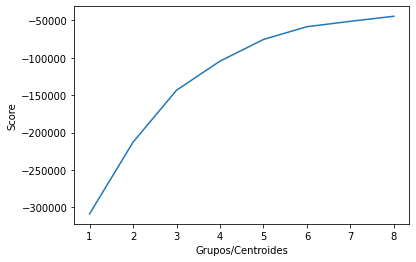

In [9]:
# Aplicamos la curva de Elbow
plt.plot(centers, scores)
plt.xlabel("Grupos/Centroides")
plt.ylabel("Score")
plt.show()

In [10]:
k_means = KMeans(n_clusters=6)

In [11]:
k_means.fit(without_gender)

KMeans(n_clusters=6)

In [12]:
k_means.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429],
       [32.69230769, 86.53846154, 82.12820513],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952]])

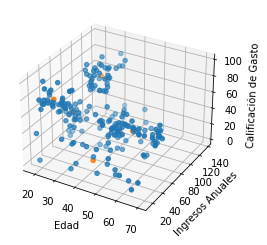

In [13]:
# Visualizaremos los datos de manera tridimensional
df_array = without_gender.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_array[:, 0], df_array[:, 1], df_array[:, 2])
centroids = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel('Edad')
axis.set_ylabel('Ingresos Anuales')
axis.set_zlabel('Calificación de Gasto')
plt.show()

In [14]:
k_means.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 0, 1,
       5, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [15]:
customer_groups = [
    'Clientes Senior',
    'Clientes Conservador',
    'Clientes Cazadores de Ofertas',
    'Clientes Pro',
    'Clientes Entusiasta',
    'Clientes Económicos'
]

In [18]:
age = 19
income = (3500*12)/1000
expenses = 90
predicted = k_means.predict([[age, income, expenses]])
print(f'Un cliente de {age} años, con ingresos de {income} Bs. anuales y un promedio de gastp {expenses} es un {customer_groups[predicted[0]]}')

Un cliente de 19 años, con ingresos de 42.0 Bs. anuales y un promedio de gastp 90 es un Clientes Entusiasta


In [19]:
df['CustomerGroup'] = k_means.labels_

In [20]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),CustomerGroup
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [22]:
df.to_csv('mall_for_classification.csv')